
# Diseño de software para cómputo científico

----

## Unidad 1: Exceptions

<small><b>Source:</b> <a href="https://realpython.com/python-exceptions/">https://realpython.com/python-exceptions/</a></small>

### Agenda de la Unidad 1
---

- **Orientación a objetos**
- Decoradores.

## Errores y exceptions
-----

Un programa de Python termina tan pronto como encuentra un error. En Python, un error puede ser un 

1. error de sintaxis (`SyntaxError`)
2. una excepción.

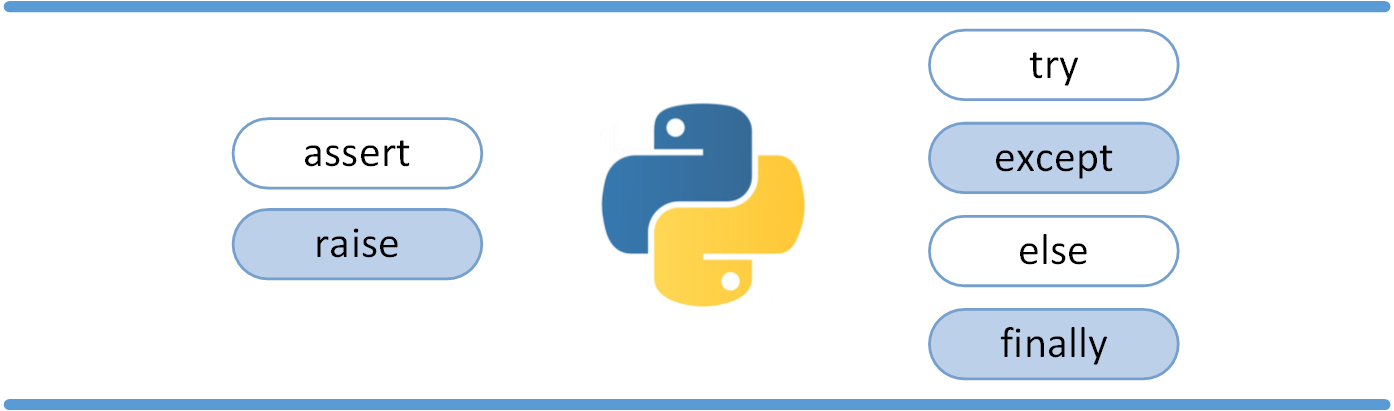

`SyntaxError` vs Exceptions
-------------

In [ ]:
def fun():
    print(1))

In [ ]:
1/0

## Exceptions
-------------

El lenguaje Python define a los errores como excepciones (Condiciones anómalas o excepcionales que requieren un procesamiento especial), así que en presencia de cualquier mala configuración se crean estados excepcionales para informar al código llamador: *"algo salió mal"*.

La clase mas importante de esta jerarquía es `Exception`.

## Exceptions
-------------

Por ejemplo, si se desea escribir una función de división que falla con un divisor igual a `0`, podríamos escribir lo siguiente:

In [ ]:
def division(a, b):
    if b == 0:
        raise Exception("b no puede ser 0")
    return a / b

In [ ]:
division(1, 0)

## Exceptions - Traceback
-----
El intérprete de python muestra las llamadas a funciones que resultaron en el error

In [ ]:
def f1():
    return 1/0

def f2():
    return f1()

def f3():
    return f2()

f3()

## Exceptions - Lanzamiento
-------------

- Podemos usar `raise` para lanzar una excepción si ocurre una condición. 
- La declaración se puede complementar con una excepción personalizada.

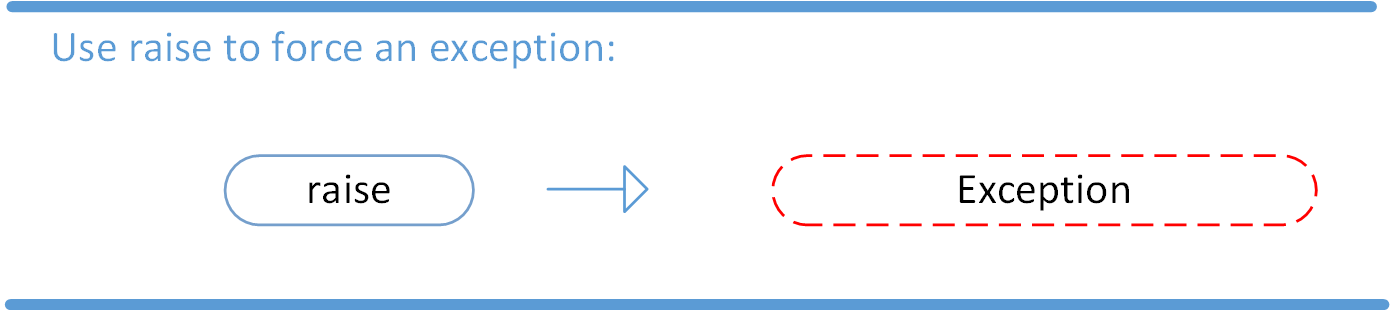


In [ ]:
x = 10
if x > 5:
    raise Exception(f'x should not exceed 5. The value of x was: {x}')

Exceptions - `AssertionError`
---

- En lugar de esperar a que un programa se rompa en producttion, se puede usar la palabra reservada `assert`. 
- Afirmamos que se cumple una determinada condición.
- Si la condición resulta ser falsa, el programa arroja una excepción `AssertionError`.
- Los `assert` se omiten cuando se ejecuta Python en modo optimizado `python -O`


In [ ]:
import sys
assert ('linux' not in sys.platform), "This code can't run on Linux systems."

### Tratamiento de excepciones
----

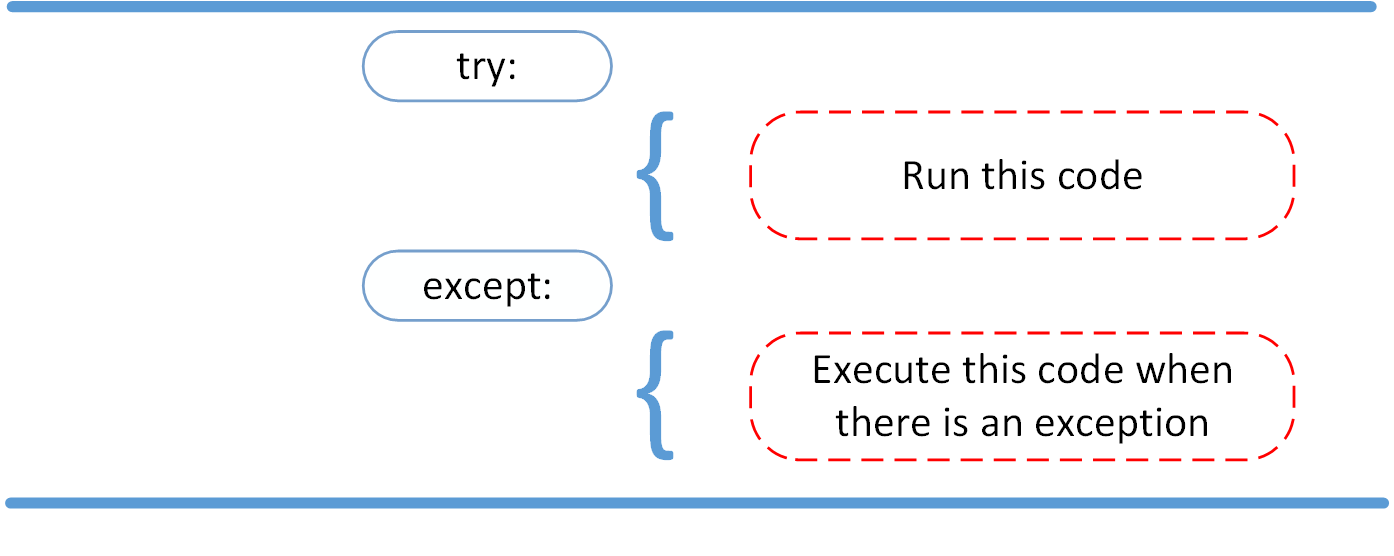

In [ ]:
def not_linux_interaction():
    assert ('linux' not in sys.platform), "Function can't run on Linux systems."
    print('Doing something.')

### Tratamiento de excepciones
----

In [ ]:
try:
    not_linux_interaction()
except:
    pass

In [ ]:
try:
    not_linux_interaction()
except:
    print('Not Linux function was not executed')

In [ ]:
try:
    not_linux_interaction()
except AssertionError as error:
    print(error)
    print('The not_linux_interaction() function was not executed')

### Tratamiento de excepciones
----

In [ ]:
open("ff") 

In [ ]:
try:
    with open('file.log') as file:
        read_data = file.read()
except:
    print('Could not open file.log')

In [ ]:
try:
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as err:
    print(err)

### Tratamiento de excepciones
----

In [ ]:
try:
    not_linux_interaction()
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as error:
    print(error)
except AssertionError as error:
    print(error)
    print('Linux not_linux_interaction() function was not executed')

### Tratamiento de excepciones
----

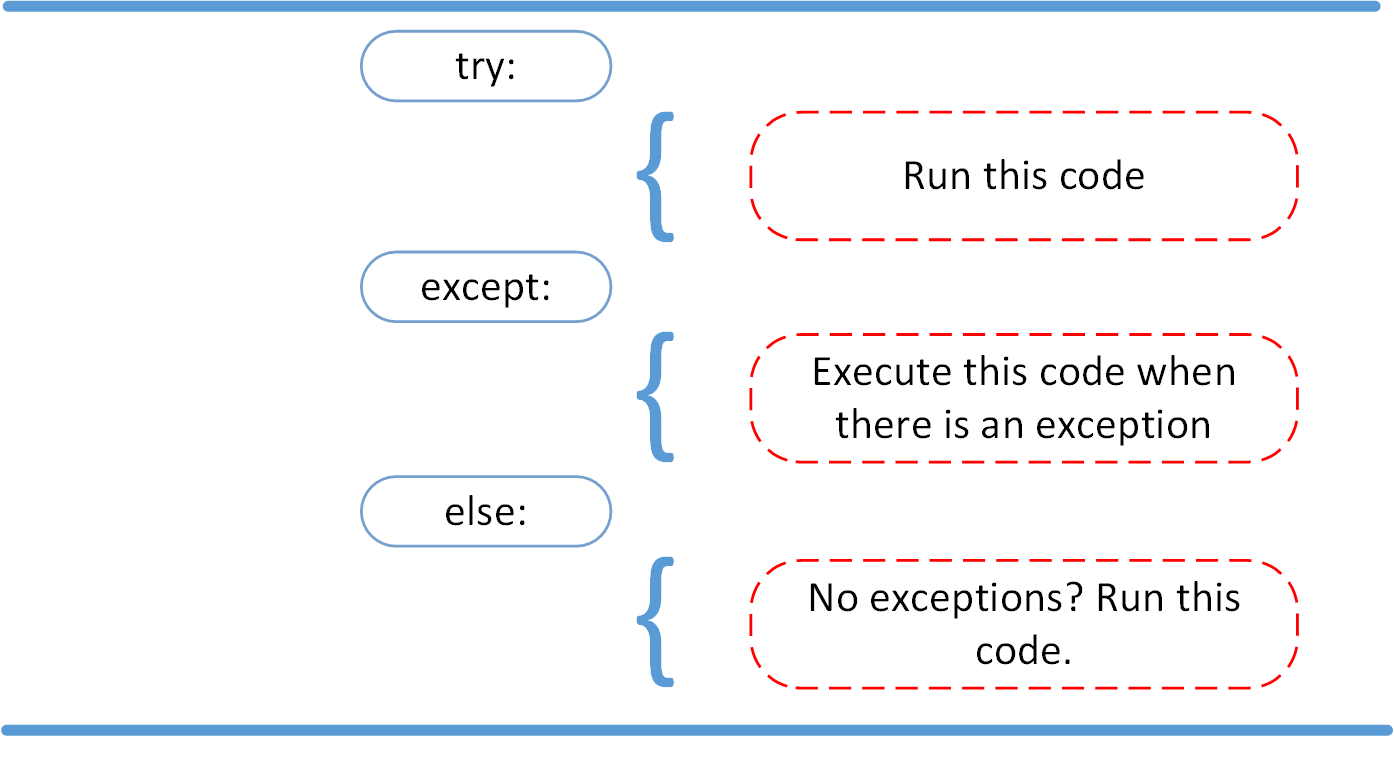

### Tratamiento de excepciones
----

In [ ]:
try:
    not_linux_interaction()
except AssertionError as error:
    print(error)
else:
    try:
        with open('file.log') as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)

### Tratamiento de excepciones
----

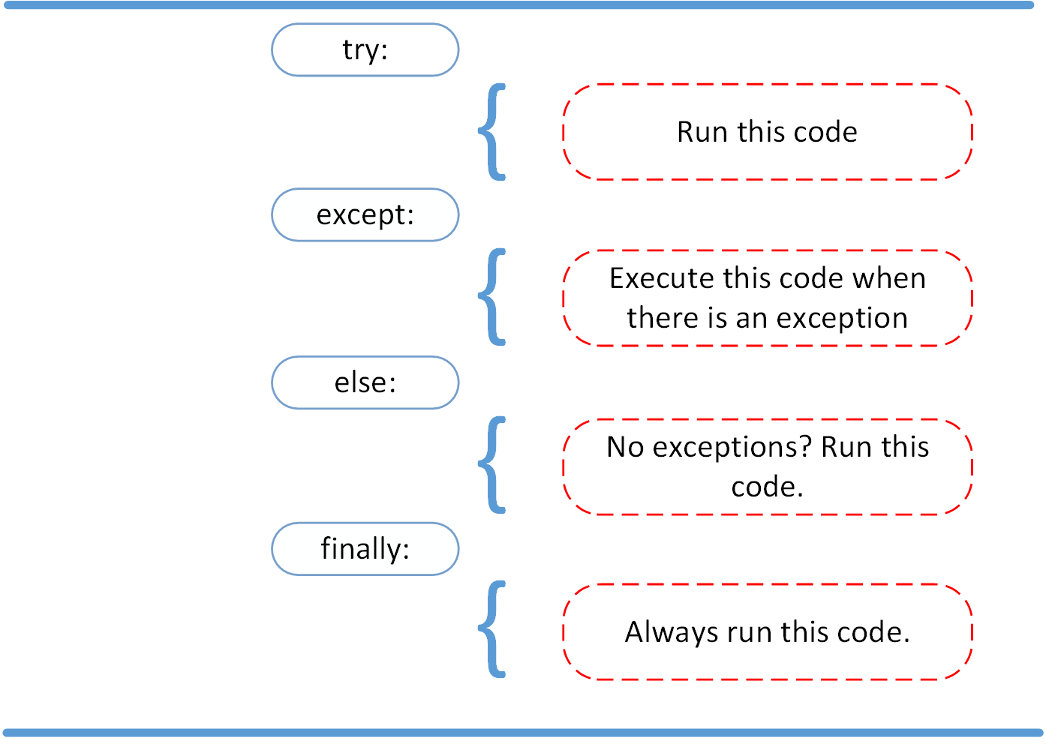

### Tratamiento de excepciones
----

In [ ]:
import warnings 
import numpy as np

def division(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        return np.inf
    finally:
        print("This function can divide by 0")

In [ ]:
division(1, 0)

## Exceptions - Herencia
----
Podemos crear excepciones personalizadas más específicas.

In [ ]:
class InvalidPixelValueError(ValueError):
    pass

In [ ]:
data = np.array([[1., 1., 1.],
                 [1., 1., np.nan],
                 [1., 1., 1.]])

In [ ]:
if not np.isfinite(data).all():
    raise InvalidPixelValueError('Hay un valor invalido')

### Nuevo comportamiento
Podemos agregar comportamiento más específico

In [ ]:
class InvalidPixelValueError(ValueError):
    
    def __init__(self, idx, message='Hay un valor invalido'):
        self.idx = idx
        self.message = message
        super().__init__(self.message)

    def __str__(self):
        return f'{self.message} --> {self.idx}'

In [ ]:
def validar(array):
    bad_idx = np.argwhere(~np.isfinite(array))
    return bad_idx

In [ ]:
if (idx := validar(data)).size:
    raise InvalidPixelValueError(idx, 'Hay un valor invalido')

### Consideraciones finales
----

- Cuando lancen una exception traten de buscar una que represente su error o creen una nueva (heredando de la exception que mas se parezca). Lista de built-in Exceptions: https://docs.python.org/3/library/exceptions.html
- Las exceptions son rápidas, pero no tan rápidas como un `if`. No usen eso para tomar decisiones *no excepcionales*
- Ademas de las exceptions existen los warnings. Que se lanzan con `warnings.warn("mensaje", Warning)`